In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("WHO_dataset.csv")

In [7]:
df.head()

,Country,Region,Year,Life_Expectancy,Infant_Mortality_Rate,Adult_Mortality_Rate,Health_Expenditure_Per_Capita_USD,GDP_Per_Capita_USD,Population_Millions,Happiness_Score
0,India,South-East Asia,2022,69.7,27.1,211,73,2389,1417,3.8
1,China,Western Pacific,2022,78.2,6.8,107,535,12720,1412,5.6
2,United States,Americas,2022,77.5,5.4,145,11200,76398,333,6.9
3,Brazil,Americas,2022,75.9,12.9,172,853,10145,215,6.1
4,Germany,Europe,2022,81.1,3.1,89,6100,48750,83,7.0


# **Data Understanding & Quality**

What is the shape of the dataset (rows, columns)?

In [8]:
df.shape

(15, 10)

Are there missing or null values in any column?

In [9]:
print(df.isnull().sum())

Country                              0
Region                               0
Year                                 0
Life_Expectancy                      0
Infant_Mortality_Rate                0
Adult_Mortality_Rate                 0
Health_Expenditure_Per_Capita_USD    0
GDP_Per_Capita_USD                   0
Population_Millions                  0
Happiness_Score                      0
dtype: int64


Are there outliers in mortality rates or GDP per capita?

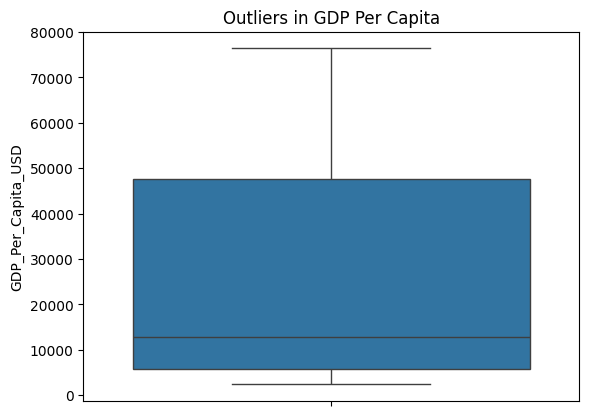

In [10]:
sns.boxplot(df['GDP_Per_Capita_USD'])

plt.title("Outliers in GDP Per Capita")

plt.show()

Are all numeric columns correctly typed?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            15 non-null     object 
 1   Region                             15 non-null     object 
 2   Year                               15 non-null     int64  
 3   Life_Expectancy                    15 non-null     float64
 4   Infant_Mortality_Rate              15 non-null     float64
 5   Adult_Mortality_Rate               15 non-null     int64  
 6   Health_Expenditure_Per_Capita_USD  15 non-null     int64  
 7   GDP_Per_Capita_USD                 15 non-null     int64  
 8   Population_Millions                15 non-null     int64  
 9   Happiness_Score                    15 non-null     float64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.3+ KB


Are regions and country names consistent?

In [12]:
df['Region'].unique()

array(['South-East Asia', 'Western Pacific', 'Americas', 'Europe',
       'Africa'], dtype=object)

In [13]:
df['Country'].unique()

array(['India', 'China', 'United States', 'Brazil', 'Germany',
       'United Kingdom', 'Japan', 'Nigeria', 'South Africa', 'Australia',
       'Canada', 'France', 'Indonesia', 'Bangladesh', 'Mexico'],
      dtype=object)

# **Descriptive Statistics**

What is the average life expectancy across all countries?

In [14]:
df['Life_Expectancy'].mean()

np.float64(75.41333333333334)

Which country has the highest and lowest infant mortality rate?

In [15]:
highest = df[df['Infant_Mortality_Rate']== df['Infant_Mortality_Rate'].max()]['Country'].values[0]

lowest = df[df['Infant_Mortality_Rate'] == df['Infant_Mortality_Rate'].min()]['Country'].values[0]

print("Highest :", highest)

print("lowest  :", lowest)

Highest : Nigeria
lowest  : Japan


How does health expenditure per capita vary by region?

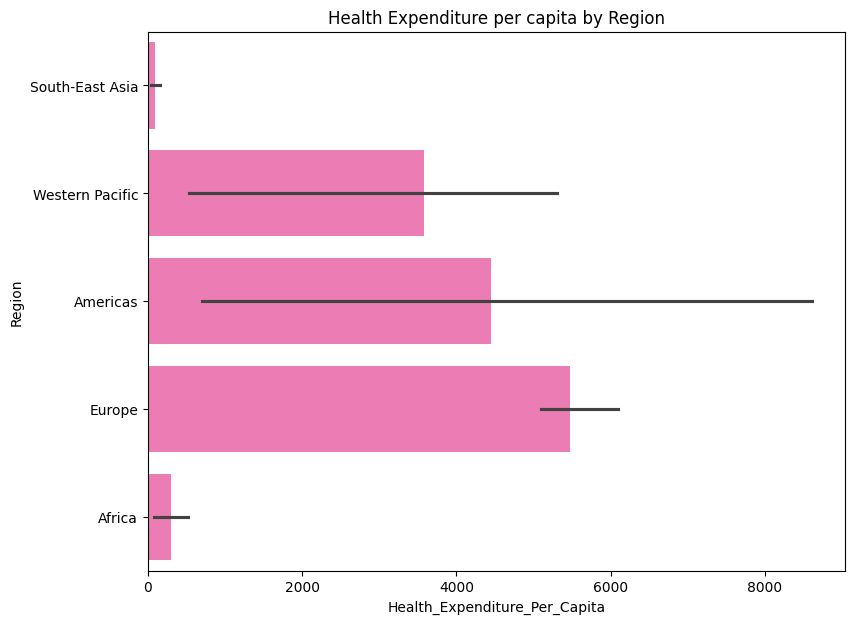

In [16]:
plt.figure(figsize = [9,7])

sns.barplot(x = 'Health_Expenditure_Per_Capita_USD', y = 'Region', data = df,  color = 'hotpink')

plt.title("Health Expenditure per capita by Region")

plt.xlabel("Health_Expenditure_Per_Capita")

plt.ylabel("Region")

plt.show()

From the bar chart above we can say that Europe has maximum health expenditure per capita followed by Americas

What is the distribution of GDP per capita?

/tmp/ipython-input-719261483.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['GDP_Per_Capita_USD'],bins= 30, kde= True, palette = 'dark')


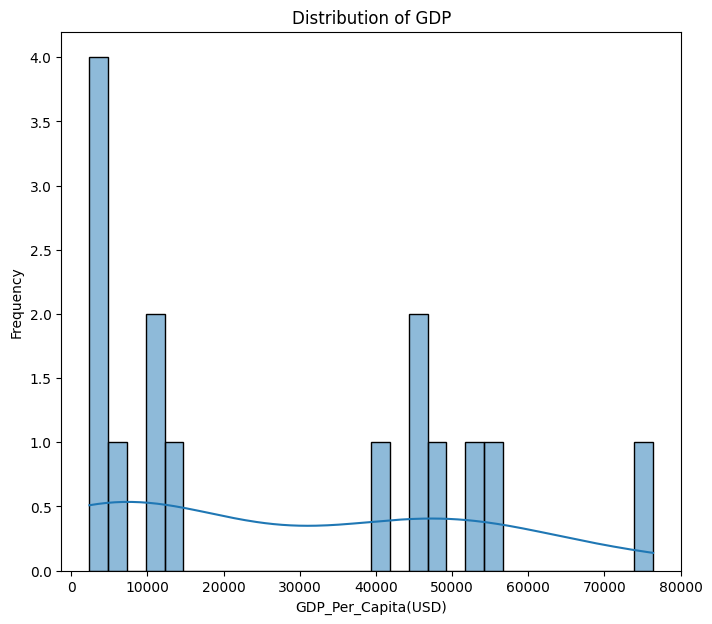

In [17]:
plt.figure(figsize = [8,7])

sns.histplot(df['GDP_Per_Capita_USD'],bins= 30, kde= True, palette = 'dark')

plt.title("Distribution of GDP")

plt.xlabel("GDP_Per_Capita(USD)")

plt.ylabel("Frequency")

plt.show()

The distribution of GDP per capita is right-skewed, with most countries having lower GDP values and a small number of high-income countries forming the upper tail.

What is the population spread among countries?

/tmp/ipython-input-3343280037.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Population_Millions'], bins=30, kde=True, palette='colorblind')


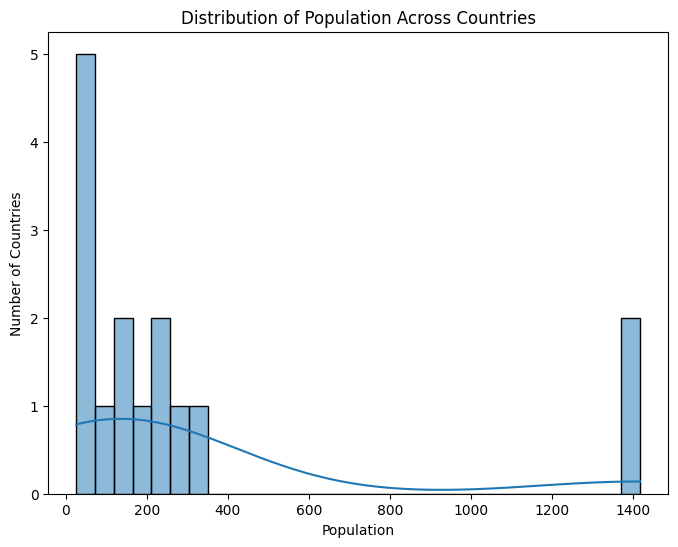

In [18]:
plt.figure(figsize=(8,6))

sns.histplot(df['Population_Millions'], bins=30, kde=True, palette='colorblind')

plt.title("Distribution of Population Across Countries")

plt.xlabel("Population")

plt.ylabel("Number of Countries")

plt.show()


# **Regional Analysis**

How does life expectancy differ by WHO region?

/tmp/ipython-input-617137821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Region', x = 'Life_Expectancy' , data = df, palette = 'colorblind')


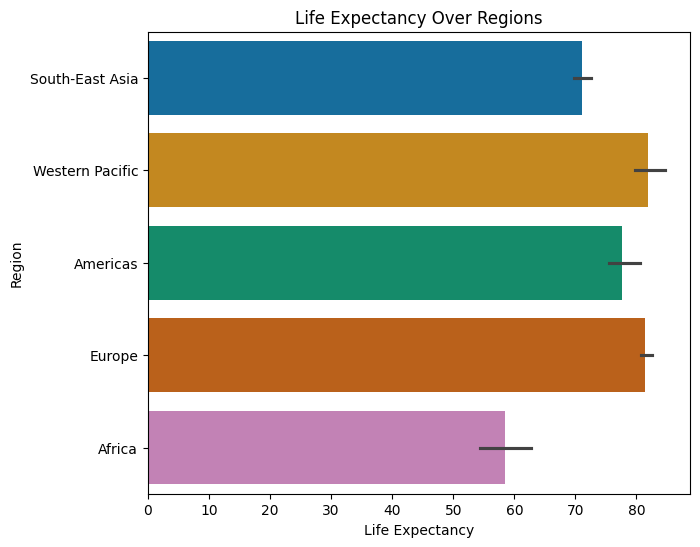

In [19]:
from typing import Container
plt.figure(figsize = [7,6])

sns.barplot(y = 'Region', x = 'Life_Expectancy' , data = df, palette = 'colorblind')

plt.title("Life Expectancy Over Regions")

plt.xlabel("Life Expectancy")

plt.ylabel("Region")

plt.show()

Life Expectancy rate is highest in Western Pacific as well as Europe which is more than 80+ years

Which region has the highest adult mortality rate?

In [23]:
df.groupby('Region')['Adult_Mortality_Rate'].mean().idxmax()


'Africa'

What is the average infant mortality rate per region?

In [25]:
avg_infant_mortality = df.groupby('Region')['Infant_Mortality_Rate'].mean()

print(avg_infant_mortality)

Region
Africa             39.400000
Americas            8.725000
Europe              3.500000
South-East Asia    24.366667
Western Pacific     3.866667
Name: Infant_Mortality_Rate, dtype: float64


Africa and South-East Asia have much higher infant mortality

Are there significant health outcome differences between regions?

In [27]:
df.groupby('Region')[['Life_Expectancy', 'Infant_Mortality_Rate', 'Adult_Mortality_Rate']].mean()

,Life_Expectancy,Infant_Mortality_Rate,Adult_Mortality_Rate
Region,,,
Africa,58.550000,39.400000,300.000000
Americas,77.650000,8.725000,146.750000
Europe,81.433333,3.500000,92.333333
South-East Asia,71.133333,24.366667,194.000000
Western Pacific,81.933333,3.866667,82.333333


# **Economic vs Health Relationships**

Is there a relationship between GDP per capita and life expectancy?

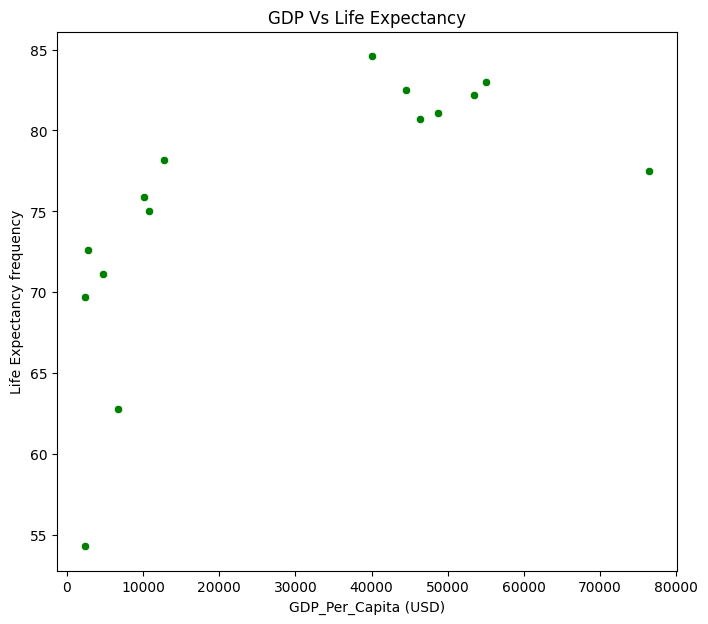

In [37]:
plt.figure(figsize = [8,7])

sns.scatterplot(x = 'GDP_Per_Capita_USD', y = 'Life_Expectancy', data =df, color = 'green')

plt.title("GDP Vs Life Expectancy")

plt.xlabel('GDP_Per_Capita (USD)')

plt.ylabel('Life Expectancy frequency')

plt.show()



The scatter plot reveals a positive relationship between GDP per capita and life expectancy, with higher-income countries generally exhibiting longer lifespans, though the relationship weakens at higher income levels.

Does higher health expenditure correlate with lower mortality rates?

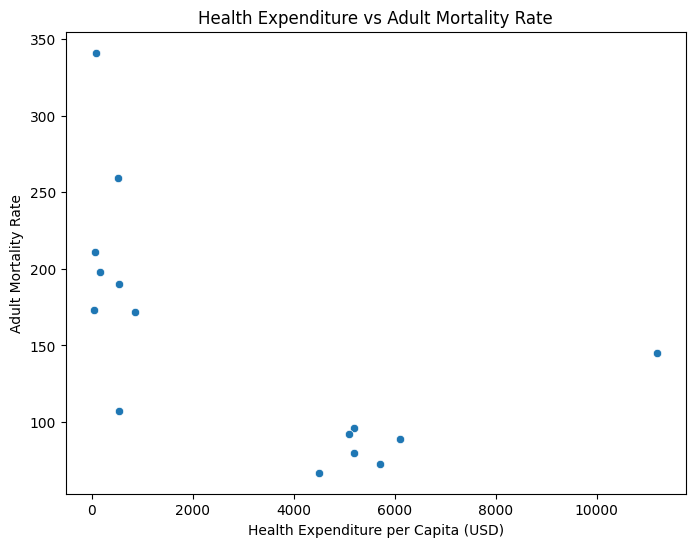

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Health_Expenditure_Per_Capita_USD',
    y='Adult_Mortality_Rate',
    data=df
)

plt.title("Health Expenditure vs Adult Mortality Rate")
plt.xlabel("Health Expenditure per Capita (USD)")
plt.ylabel("Adult Mortality Rate")
plt.show()


The scatter plot shows a negative correlation between health expenditure per capita and adult mortality rate, indicating that countries investing more in healthcare generally experience lower adult mortality.

How does GDP per capita affect infant mortality?

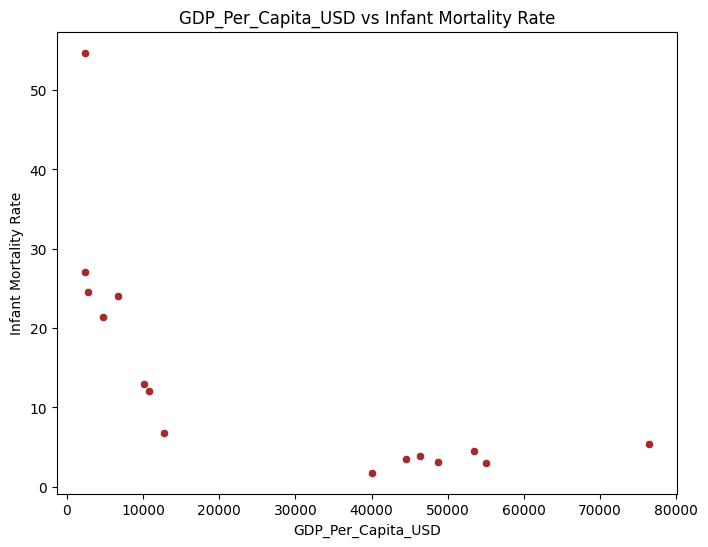

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='GDP_Per_Capita_USD',
    y='Infant_Mortality_Rate',
    data=df, color = 'brown'
)

plt.title("GDP_Per_Capita_USD vs Infant Mortality Rate")
plt.xlabel("GDP_Per_Capita_USD")
plt.ylabel("Infant Mortality Rate")
plt.show()


The scatter plot indicates a clear negative correlation between GDP per capita and infant mortality rate. Countries with higher GDP per capita (approximately USD 40,000–60,000) tend to exhibit significantly lower infant mortality rates, while countries with lower GDP per capita (below USD 10,000) show substantially higher infant mortality rates. This pattern highlights the strong association between economic prosperity and improved healthcare outcomes.

Happiness Index

/tmp/ipython-input-2191076742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Country', y = 'Happiness_Score', data = df, palette= 'bright')


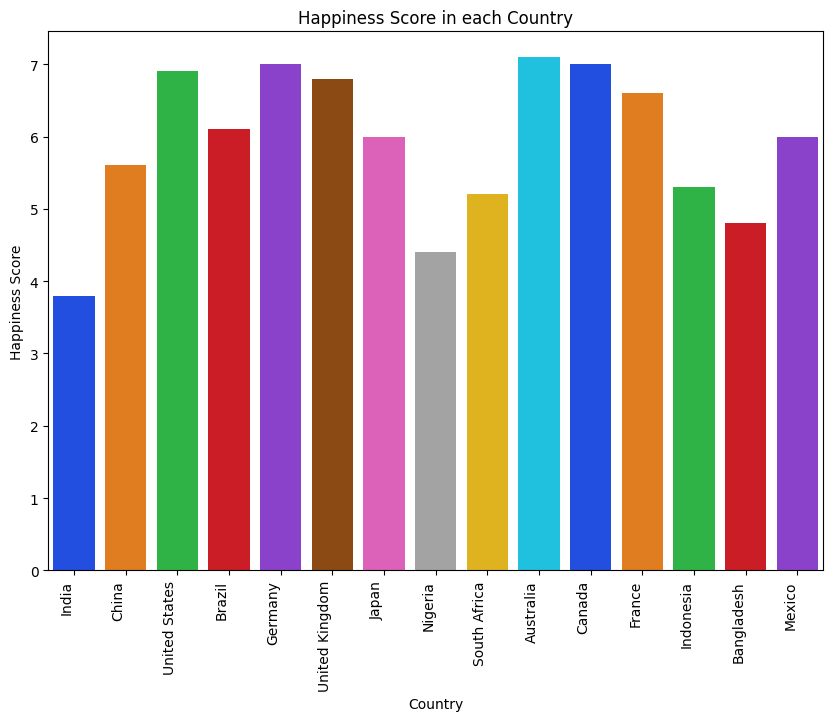

In [54]:

plt.figure(figsize = [10,7])

ax = sns.barplot(x = 'Country', y = 'Happiness_Score', data = df, palette= 'bright')


plt.title('Happiness Score in each Country')

plt.xlabel('Country')

plt.ylabel('Happiness Score')

plt.xticks(rotation=90, ha='right')

plt.show()

According to WHO Germany and Austraila have highest happiness rate

Population in every region

Text(0, 0.5, 'population in millions')

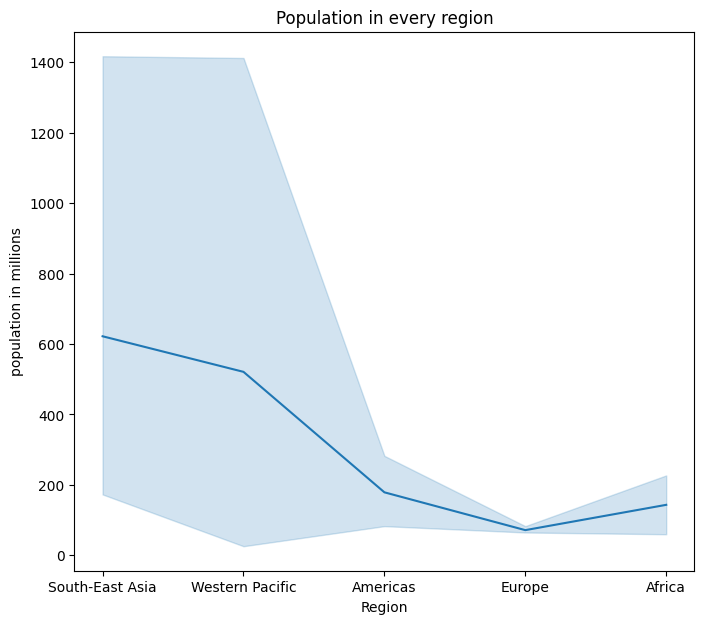

In [64]:
plt.figure(figsize = [8,7])

sns.lineplot(x='Region', y ='Population_Millions', data=df)

plt.title('Population in every region')

plt.xlabel('Region')

plt.ylabel('population in millions')

South East has the highest number of population followed by Western Pacific Region